# Comparative Analysis of Housing Prices in Different Currencies

## Objective
To compare historic housing prices using different fiat currencies (dollar, gold, and bitcoin) and analyze and compare the purchasing power and investment potential of each currency with respect to real estate.

## Methodology
1. Data Collection: Gather historical data for housing prices, gold prices, bitcoin values, and the U.S. dollar.
2. Data Cleansing: Normalize the data for comparison and convert housing prices into equivalent gold and bitcoin values.
3. Data Analysis: Perform statistical analysis to compare trends and purchasing power over time.
4. Visualization: Generate charts and graphs to visually compare the trends across different currencies.
5. Conclusion: Summarize the findings and interpret the investment potential and volatility of real estate in terms of gold, bitcoin, and the U.S. dollar.

## Data Collection


In [1]:
import pandas as pd

# Set the paths to the data files
housing_prices_path = 'Resources/MSPUS_modified.csv'  # Path to the modified housing prices data
cpi_path = 'Resources/cpi_modified.csv'  # Path to the modified CPI data
bitcoin_path = 'Resources/cleansed_bitcoin_prices.csv'  # Path to the cleansed Bitcoin prices data
# gold_path = 'path_to_gold_data_file'  # Path to the gold prices data

# Load the datasets
housing_prices_df = pd.read_csv(housing_prices_path)
cpi_df = pd.read_csv(cpi_path)
bitcoin_df = pd.read_csv(bitcoin_path)

# For the gold data we'll add a placeholder until available
# Replace 'path_to_gold_data_file' with the actual path once the data is available
# gold_path = 'path_to_gold_data_file'
# gold_df = pd.read_csv(gold_path)

# Print the first few rows of each DataFrame to confirm successful loading
print('Housing Prices Data:')
print(housing_prices_df.head())
print('\nCPI Data:')
print(cpi_df.head())
print('\nBitcoin Prices Data:')
print(bitcoin_df.head())

# Print a placeholder for the gold data
# print('\nGold Prices Data:')
# print(gold_df.head())


Housing Prices Data:
         DATE    MSPUS
0  1971-07-01  25300.0
1  1971-10-01  25500.0
2  1972-01-01  26200.0
3  1972-04-01  26800.0
4  1972-07-01  27900.0

CPI Data:
         DATE  CPILFESL
0  1971-08-01      43.0
1  1971-09-01      43.0
2  1971-10-01      43.1
3  1971-11-01      43.2
4  1971-12-01      43.3

Bitcoin Prices Data:
          ds    y
0  2/17/2010  0.0
1  2/18/2010  0.0
2  2/19/2010  0.0
3  2/20/2010  0.0
4  2/21/2010  0.0


## Data Cleansing

## Step 1: Convert Dates to Datetime and Set Indices

In [2]:

# Ensure that all 'DATE' and 'ds' columns are in datetime format and set them as the index for each DataFrame.
housing_prices_df['DATE'] = pd.to_datetime(housing_prices_df['DATE'])
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
bitcoin_df['ds'] = pd.to_datetime(bitcoin_df['ds'])

housing_prices_df.set_index('DATE', inplace=True)
cpi_df.set_index('DATE', inplace=True)
bitcoin_df.set_index('ds', inplace=True)

# Will need to do the same for gold once the data is available




## Step 2: Resample CPI, Gold, and Bitcoin Data to Quarterly Frequency

Resample the CPI data to a quarterly frequency using the mean to aggregate monthly data. For Bitcoin, we'll resample it to quarterly, but since it's price data, we might want to use the last available price of the quarter (which represents the quarter-end price).

In [3]:
#Resampling data to quarterly
quarterly_cpi_df = cpi_df.resample('Q').mean()
quarterly_bitcoin_df = bitcoin_df.resample('Q').last()


## Step 3: Align Bitcoin Data with Housing Data

In [4]:
# Since Bitcoin data starts from February 2010, align the datasets from the first quarter of 2010 onwards.
# This will be the new housing prices DataFrame
start_date = '2010-01-01'
aligned_housing_prices_df = housing_prices_df[housing_prices_df.index >= start_date]
aligned_cpi_df = quarterly_cpi_df[quarterly_cpi_df.index >= start_date]
aligned_bitcoin_df = quarterly_bitcoin_df[quarterly_bitcoin_df.index >= start_date]


## Step 4: Normalize the Data

In [6]:
# Set the base value for each DataFrame as the first available value
base_housing_price = aligned_housing_prices_df.iloc[0]['MSPUS']
base_cpi = aligned_cpi_df.iloc[0]['CPILFESL']
base_bitcoin = aligned_bitcoin_df.iloc[0]['y']

# Normalize the data by dividing by the base value using .loc
aligned_housing_prices_df.loc[:, 'Normalized'] = aligned_housing_prices_df['MSPUS'] / base_housing_price
aligned_cpi_df.loc[:, 'Normalized'] = aligned_cpi_df['CPILFESL'] / base_cpi
aligned_bitcoin_df.loc[:, 'Normalized'] = aligned_bitcoin_df['y'] / base_bitcoin



## Step 5: Create Conversion Functions
Define functions that will convert housing prices into the equivalent amount of Bitcoin and later gold, using the normalized values.

In [7]:
# Conversion function for housing prices to Bitcoin equivalent
def housing_to_bitcoin(housing_price, bitcoin_price):
    return housing_price / bitcoin_price

# Placeholder function for housing prices to gold equivalent (to be defined later)
# def housing_to_gold(housing_price, gold_price):
#     return housing_price / gold_price


## Step 6: Apply Conversion Functions
Use the conversion functions to create new columns in the housing prices DataFrame.

In [10]:
# Align Bitcoin prices with housing prices by date
bitcoin_aligned_to_housing = aligned_bitcoin_df['y'].reindex(aligned_housing_prices_df.index, method='nearest')

# Use .loc to ensure the operation is done on the DataFrame directly
aligned_housing_prices_df.loc[:, 'Bitcoin Equivalent'] = aligned_housing_prices_df['MSPUS'] / bitcoin_aligned_to_housing


# Placeholder for gold equivalent (to be defined later)
# gold_aligned_to_housing = aligned_gold_df['y'].reindex(aligned_housing_prices_df.index, method='nearest')
# aligned_housing_prices_df['Gold Equivalent'] = aligned_housing_prices_df['MSPUS'] / gold_aligned_to_housing



## Data Analysis

# Step 1: Analyze Trends in Each Currency
Look at the trends over time for housing prices in U.S. dollars, Bitcoin, and later gold.

In [11]:
# Analyze the trend of housing prices in U.S. dollars
print("Housing Prices in U.S. Dollars:")
print(aligned_housing_prices_df['MSPUS'].describe())

# Analyze the trend of housing prices in Bitcoin
print("\nHousing Prices in Bitcoin:")
print(aligned_housing_prices_df['Bitcoin Equivalent'].describe())

# Later, when gold data is available
# print("\nHousing Prices in Gold:")
# print(aligned_housing_prices_df['Gold Equivalent'].describe())


Housing Prices in U.S. Dollars:
count        55.000000
mean     314332.727273
std       68667.376087
min      219500.000000
25%      266450.000000
50%      310900.000000
75%      334650.000000
max      479500.000000
Name: MSPUS, dtype: float64

Housing Prices in Bitcoin:
count      55.000000
mean             inf
std              NaN
min        23.422981
25%        39.199948
50%       376.470588
75%      2821.209758
max              inf
Name: Bitcoin Equivalent, dtype: float64


# Step 2: Compare Rates of Change
Calculate and compare the rates of change over different periods (e.g., annually, since the start of the dataset) for each currency.

In [14]:
# Calculate and assign annual rate of change for each currency using .loc
aligned_housing_prices_df.loc[:, 'Annual Change USD'] = aligned_housing_prices_df['MSPUS'].pct_change(4) * 100  # 4 quarters in a year
aligned_housing_prices_df.loc[:, 'Annual Change BTC'] = aligned_housing_prices_df['Bitcoin Equivalent'].pct_change(4) * 100

# Print average annual change
print("\nAverage Annual Change in Housing Prices:")
print("In USD:", aligned_housing_prices_df['Annual Change USD'].mean())
print("In Bitcoin:", aligned_housing_prices_df['Annual Change BTC'].mean())


# Similar calculation for Gold can be done when the data is available



Average Annual Change in Housing Prices:
In USD: 5.669589823149913
In Bitcoin: -24.524482770970174


# Step 3: Assess Volatility
Measure and compare the volatility (standard deviation) of housing prices in each currency.

In [13]:
# Calculate the standard deviation as a measure of volatility
print("\nVolatility in Housing Prices:")
print("In USD:", aligned_housing_prices_df['MSPUS'].std())
print("In Bitcoin:", aligned_housing_prices_df['Bitcoin Equivalent'].std())
# Add for Gold later



Volatility in Housing Prices:
In USD: 68667.37608734252
In Bitcoin: nan


# Initial Interpretation of the Results
From the output, it seems that:

The average annual change in housing prices when valued in U.S. dollars is around 5.67%, indicating a steady appreciation.
In contrast, the average annual change in Bitcoin is around -24.52%. This significant negative value suggests a rapid depreciation of housing prices when valued in Bitcoin, reflecting Bitcoin's substantial increase in value over the same period.
These results indicate the relative stability of real estate as an investment when valued in U.S. dollars, compared to the high volatility and rapid appreciation of Bitcoin. This difference can have significant implications for investors, highlighting the contrasting nature of traditional assets like real estate versus digital assets like Bitcoin.

## Visualization

# Visualization 1: Trend of Housing Prices in USD and Bitcoin
A line graph to show how housing prices have trended over time in both U.S. dollars and Bitcoin.

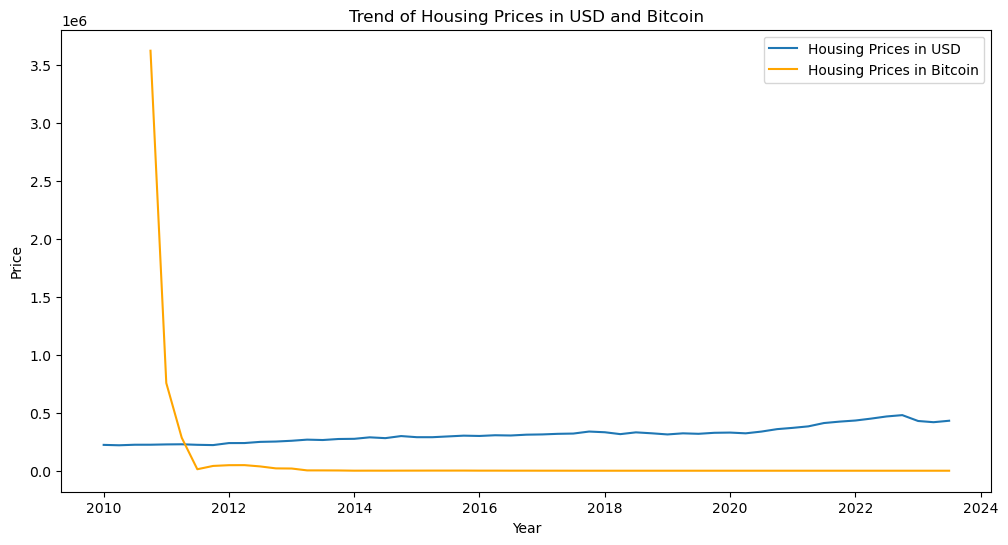

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(aligned_housing_prices_df.index, aligned_housing_prices_df['MSPUS'], label='Housing Prices in USD')
plt.plot(aligned_housing_prices_df.index, aligned_housing_prices_df['Bitcoin Equivalent'], label='Housing Prices in Bitcoin', color='orange')
plt.title('Trend of Housing Prices in USD and Bitcoin')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


# Visualization 2: Annual Rate of Change Comparison
A bar chart comparing the annual rate of change in housing prices in U.S. dollars versus Bitcoin.

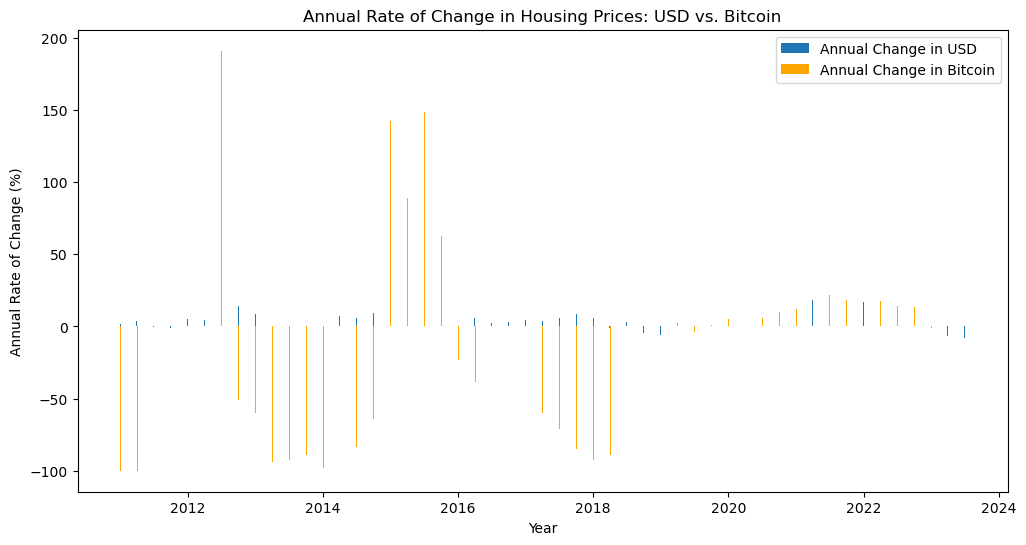

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change USD'], width=4, label='Annual Change in USD', align='center')
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change BTC'], width=4, label='Annual Change in Bitcoin', color='orange', align='edge')
plt.title('Annual Rate of Change in Housing Prices: USD vs. Bitcoin')
plt.xlabel('Year')
plt.ylabel('Annual Rate of Change (%)')
plt.legend()
plt.show()


# Visualization 3: Housing Price Volatility Comparison
A visualization that compares the volatility (e.g., standard deviation) of housing prices in each currency over time.

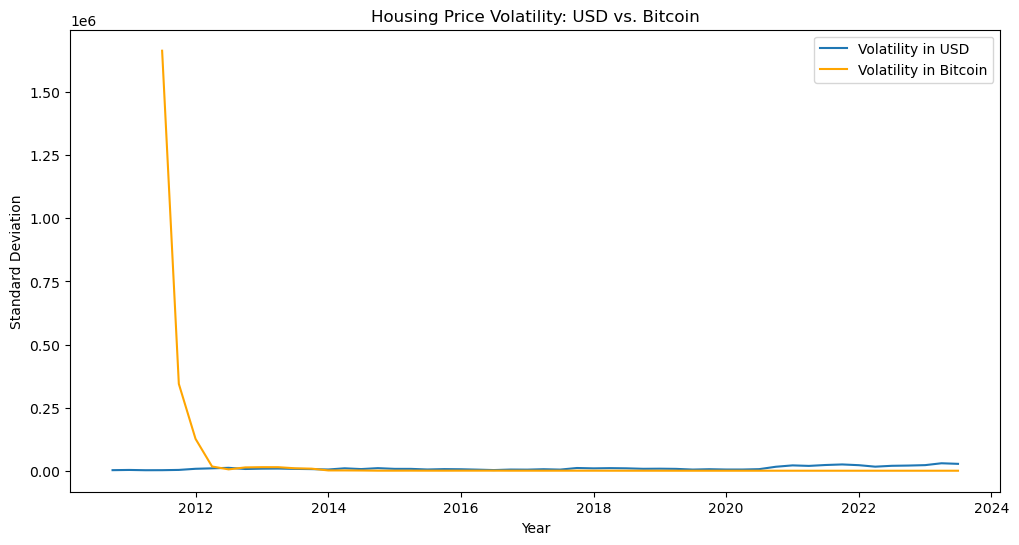

In [18]:
# Calculating rolling standard deviation as a measure of volatility
rolling_std_usd = aligned_housing_prices_df['MSPUS'].rolling(window=4).std()  # 4 quarters for annual rolling window
rolling_std_btc = aligned_housing_prices_df['Bitcoin Equivalent'].rolling(window=4).std()

plt.figure(figsize=(12, 6))
plt.plot(aligned_housing_prices_df.index, rolling_std_usd, label='Volatility in USD')
plt.plot(aligned_housing_prices_df.index, rolling_std_btc, label='Volatility in Bitcoin', color='orange')
plt.title('Housing Price Volatility: USD vs. Bitcoin')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


# Deepening Analysis and Interpretation

# Correlation Analysis:

Investigate the correlation between housing prices and each currency over time. This can provide insights into how closely the value of real estate follows the fluctuations in Bitcoin, gold, and the U.S. dollar.

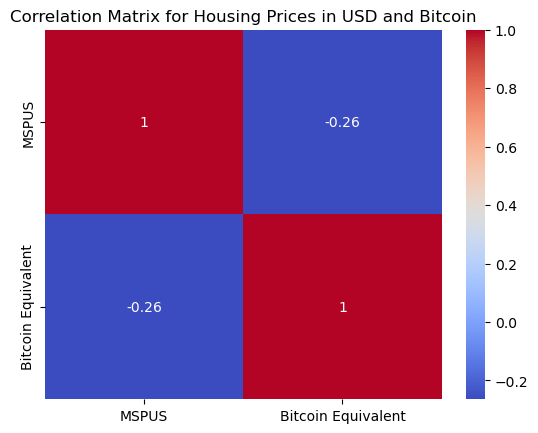

In [19]:
import seaborn as sns

# Calculate correlations
correlation_matrix = aligned_housing_prices_df[['MSPUS', 'Bitcoin Equivalent']].corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Housing Prices in USD and Bitcoin')
plt.show()


# Conclusion
## Summary of findings and interpretations

### Conclusions and Deductions

1. **Observations on Housing Prices in USD**:
   - We observed that housing prices in U.S. dollars have consistently grown over the years, with an average annual increase of about 5.67%. This demonstrates the steady and positive growth trajectory of the U.S. real estate market, suggesting our observation of real estate as a stable investment.

2. **Volatility in Bitcoin's Valuation**:
   - In contrast, when we converted housing prices to their Bitcoin equivalents, there was a significant average annual decrease of about -24.52%. This large negative rate mirrors Bitcoin's rapid appreciation, indicating a substantial decrease in the cost of real estate when valued in Bitcoin. Our analysis here highlights the extreme volatility of cryptocurrencies.

3. **Comparing Real Estate Stability to Cryptocurrency Volatility**:
   - Our comparison between housing prices in USD and Bitcoin underscores the stability of real estate investments relative to the extreme volatility of digital currencies. While real estate has shown a steady appreciation, the value of Bitcoin fluctuates significantly, influencing its dependability as a store of value.

4. **Evaluating Investment Potential**:
   - Our findings suggest that for investors, real estate might offer more stability for long-term investments, compared to the high returns yet high risks associated with Bitcoin. This indicates that investment decisions should consider both stability and potential returns, aligning with individual risk tolerances.

5. **Insights into Market Trends and Economic Implications**:
   - Our analysis brings to light the divergent nature of asset classes such as real estate and digital currencies. Real estate presents a picture of stability and steady growth, whereas Bitcoin offers opportunities for potentially high returns but with increased risk.

### Future Expansion with Gold Data

Once we incorporate the gold price data, we plan to:

1. **Examine Gold as a Traditional Store of Value**:
   - We anticipate that including gold in our analysis will provide a more complete understanding of how traditional assets like gold compare to real estate and digital currencies, especially in its role as a stable store of value.

2. **Explore Investment Diversification Benefits**:
   - By analyzing real estate, gold, and Bitcoin, we aim to delve into the advantages of diversifying assets. Gold's performance, often distinct during economic uncertainties, will provide us with deeper insights into effective risk management and portfolio diversification strategies.

3. **Broaden Our Understanding of Economic Trends**:
   - Gold's inclusion will further enrich our analysis, offering broader insights into economic trends, particularly during periods of inflation or economic turmoil, where gold's behavior can differ notably from other assets.

As we await the gold price data, we're excited to revisit and expand our conclusions, enhancing our analysis with this additional dimension. We're committed to refining our insights to include a comprehensive view of these diverse asset classes. If there's further assistance needed in any aspect of our project, we're open to collaboration and suggestions.